In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import datetime
import seaborn as sns
from datetime import date


In [2]:
#anaconda --version 

In [3]:
#import seaborn as sns
#import sklearn as sk

In [4]:
age_gender_df = pd.read_csv('age_gender_bkts.csv/age_gender_bkts.csv')
age_gender_df
nanCount = age_gender_df.isnull().sum()
#print(nanCount)
print(age_gender_df['age_bucket'].value_counts())


100+     20
50-54    20
15-19    20
20-24    20
25-29    20
30-34    20
35-39    20
40-44    20
45-49    20
55-59    20
95-99    20
60-64    20
65-69    20
70-74    20
75-79    20
80-84    20
85-89    20
90-94    20
0-4      20
Name: age_bucket, dtype: int64


In [5]:
countries_df =  pd.read_csv('countries.csv\countries.csv')
countries_df

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [6]:
sessions_dfm = pd.read_csv('sessions.csv\sessions.csv')
sessions_dfm
# 10567737 rows × 6 columns

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [7]:
print(sessions_dfm['action'].value_counts())

show              2768278
index              843699
search_results     725226
personalize        706824
search             536057
                   ...   
deauthorize             1
events                  1
reactivate              1
desks                   1
nyan                    1
Name: action, Length: 359, dtype: int64


In [8]:
print(sessions_dfm['action_type'].value_counts())

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64


In [9]:
print(sessions_dfm['action_detail'].value_counts())

view_search_results         1776885
p3                          1376550
-unknown-                   1031141
wishlist_content_update      706824
user_profile                 656839
                             ...   
special_offer_field               3
tos_2014                          2
host_refund_guest                 2
host_respond_page                 2
host_standard_suspension          1
Name: action_detail, Length: 155, dtype: int64


In [10]:
print(sessions_dfm['device_type'].value_counts())

Mac Desktop                         3594286
Windows Desktop                     2658539
iPhone                              2105031
Android Phone                        839637
iPad Tablet                          683414
Android App Unknown Phone/Tablet     273652
-unknown-                            211279
Tablet                               139886
Linux Desktop                         28373
Chromebook                            22348
iPodtouch                              8198
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: device_type, dtype: int64


In [11]:
print(sessions_dfm['secs_elapsed'].describe())
# Take log of seconds, too big of a range 

count    1.043171e+07
mean     1.940581e+04
std      8.888424e+04
min      0.000000e+00
25%      2.290000e+02
50%      1.147000e+03
75%      8.444000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64


In [12]:
train_users_dfm = pd.read_csv('train_users.csv/train_users.csv', index_col=None)
test_users_dfm = pd.read_csv('test_users.csv/test_users.csv', index_col=None)

In [13]:
# The training and testing data 
print('The columns name of training dataset:\n',train_users_dfm.columns)
print('The number of users is: ', train_users_dfm.shape[0], ' with ',len( train_users_dfm.columns ), ' features.')
train_users_dfm

The columns name of training dataset:
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')
The number of users is:  213451  with  16  features.


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [14]:
# The number of unknown ages
nanAges = train_users_dfm.age.isna().sum()
print('There are ', nanAges, ' unknown ages.')

There are  87990  unknown ages.


16 

 16


c:\Users\nadin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

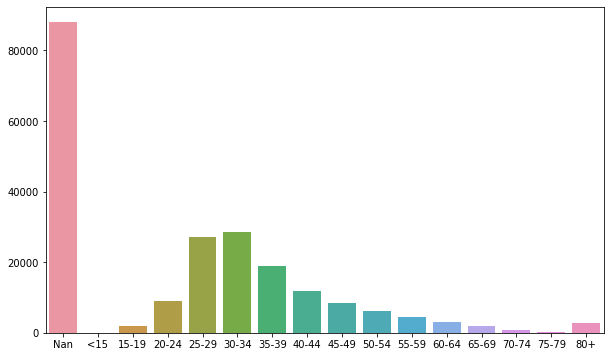

In [15]:
# In the age gender buckets, we have stats for every country, and each age bucket for these countries
# These age buckets are of 5 intervals 
# Here we choose to have 15 intervals, and the unknown.
train = train_users_dfm
age_train =[train_users_dfm.age.isna().sum(),
            train.query('age < 15').age.shape[0], train.query('age >= 15 & age <20').age.shape[0],
            train.query('age >= 20 & age <25').age.shape[0], train.query('age >= 25 & age <30').age.shape[0],
            train.query('age >= 30 & age <35').age.shape[0], train.query("age >= 35 & age <40").age.shape[0],
            train.query("age >= 40 & age <45").age.shape[0], train.query("age >= 45 & age <50").age.shape[0],
            train.query("age >= 50 & age <55").age.shape[0], train.query("age >= 55 & age <60").age.shape[0],
            train.query("age >= 60 & age <65").age.shape[0], train.query("age >= 65 & age <70").age.shape[0],
            train.query("age >= 70 & age <75").age.shape[0], train.query("age >= 75 & age <80").age.shape[0],
            train.query("age >= 80").age.shape[0]]

age_buckets_14 = ['Nan','<15', '15-19', '20-24', '25-29', '30-34','35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
print(len(age_buckets_14), '\n\n', len(age_train))
# plot
fig = plt.figure(figsize=(10,6))
sns.barplot(age_buckets_14, age_train)

In [16]:
# In the age gender buckets, we have stats for every country, and each age bucket for these countries
# These age buckets are of 5 intervals 
train = train_users_dfm
age_train =[train_users_dfm.age.isna().sum(),
            train.query('age < 15').age.shape[0], train.query('age >= 15 & age <25').age.shape[0],
            train.query('age >= 25 & age <35').age.shape[0], train.query('age >= 35 & age <45').age.shape[0],
            train.query('age >= 45 & age <55').age.shape[0], train.query("age >= 55 & age <65").age.shape[0],
            train.query("age >= 65 & age <75").age.shape[0], train.query("age >= 75 & age <85").age.shape[0],
            train.query('age >= 85').age.shape[0]]


print(age_train)

[87990, 57, 10778, 55694, 30759, 14521, 7599, 2902, 481, 2670]


c:\Users\nadin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='gender'>

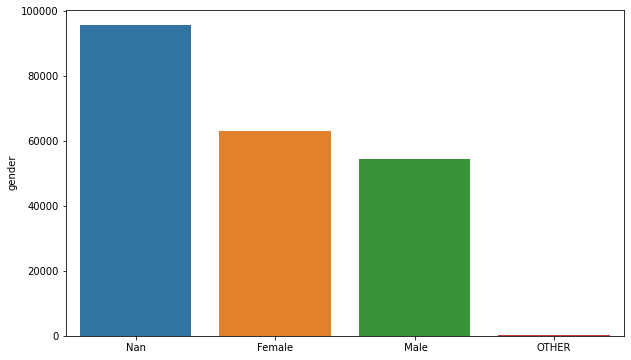

In [25]:
genders = train_users_dfm['gender'].value_counts()
# plot
fig = plt.figure(figsize=(10,6))
labels = ['Nan', 'Female', ' Male', 'OTHER']
sns.barplot(labels, genders)


In [26]:
def vizualizeFeatures(feature, df_train = train_users_dfm, df_test = test_users_dfm, figsize=(10,5), rot = 90, saveimg = True): 
    #  df_train[feature].value_counts().sum()
    feat_train = df_train[feature].value_counts()
    feat_test = df_test[feature].value_counts()

    # Plot 2 graphs next to each other
    fig_feature, (a1,a2) = plt.subplots(1,2,sharex=True, sharey = True, figsize = figsize)

    sns.barplot(feat_train.index.values, feat_train.values, ax = a1)
    sns.barplot(feat_test.index.values, feat_test.values, ax = a2)

    a1.set_xticklabels(a1.xaxis.get_majorticklabels(), rotation = rot)
    a2.set_xticklabels(a1.xaxis.get_majorticklabels(), rotation = rot)
    a1.set_title(feature + ' of training dataset')
    a2.set_title(feature + ' of test dataset')
    a1.set_ylabel('Counts')
    plt.tight_layout()
    if saveimg == True:
        figname = feature + ".png"
        fig_feature.savefig(figname, dpi = 75)



c:\Users\nadin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\nadin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\nadin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

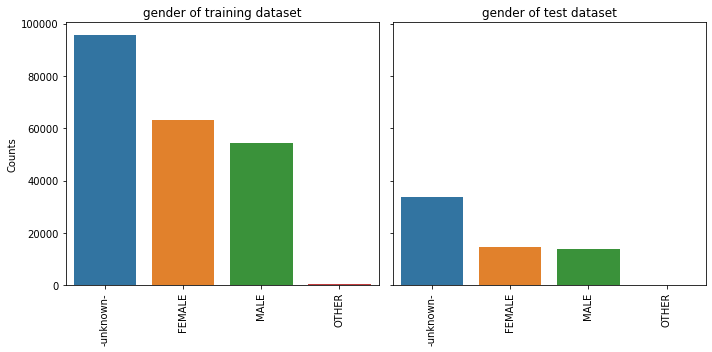

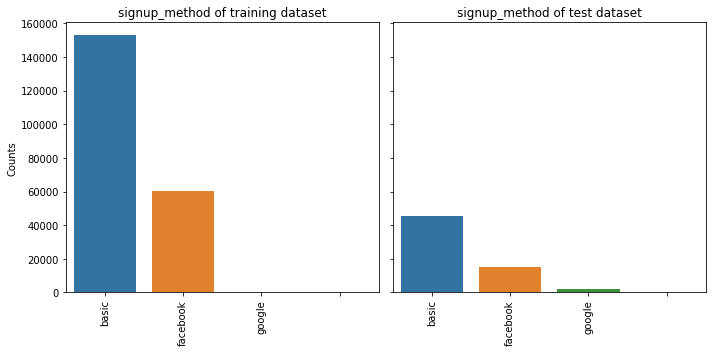

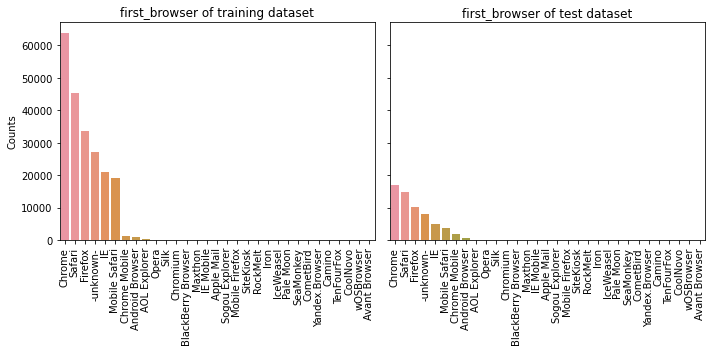

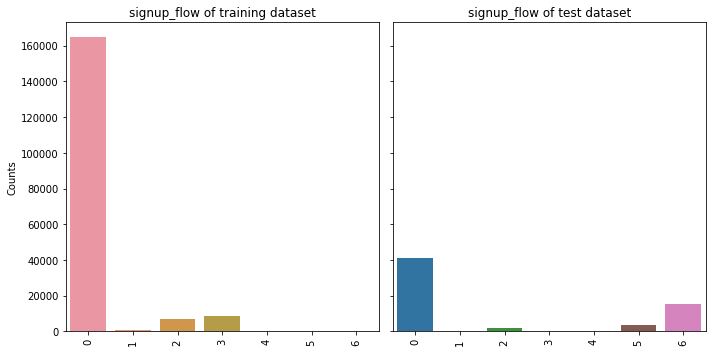

In [30]:
vizualizeFeatures('gender')
# Note proble mi nsign up, train has no users signing  up by google, but test has relatively a lot
vizualizeFeatures('signup_method')
vizualizeFeatures('first_browser')
vizualizeFeatures('signup_flow')


In [24]:
print(genders.shape)

(4,)


In [18]:
print(train_users_dfm.isnull().sum())

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64


In [19]:
print('Value counts for gender: \n', train_users_dfm['gender'].value_counts(), '\n\n')
print('Value counts for destination country:\n', train_users_dfm['country_destination'].value_counts())

Value counts for gender: 
 -unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64 


Value counts for destination country:
 NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64


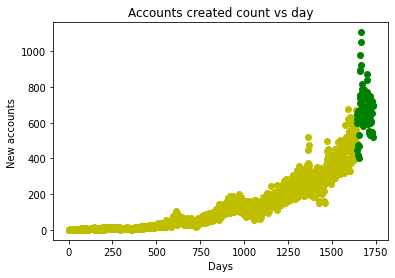

In [20]:
# Extract date accout creation from train, convert  to date
dac_train = train_users_dfm.date_account_created.value_counts()
dac_train_date = pd.to_datetime(train_users_dfm.date_account_created.value_counts().index)
# Assume first user is 1st day of website launch, and get dates since
dac_train_day = dac_train_date - dac_train_date.min()

# repeat for test users
dac_test = test_users_dfm.date_account_created.value_counts()
dac_test_date = pd.to_datetime(test_users_dfm.date_account_created.value_counts().index)
dac_test_day = dac_test_date - dac_train_date.min()

# Sketch a scatter of days age of account and count of new users in that dat
plt.scatter(dac_train_day.days, dac_train.values, color = 'y', label = 'train dataset')
plt.scatter(dac_test_day.days, dac_test.values, color = 'g', label = 'test dataset')

plt.title("Accounts created count vs day")
plt.xlabel("Days")
plt.ylabel("New accounts ")
plt.rcParams["figure.figsize"] = (30,15)